In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"].astype(np.int64)


/Users/raman/miniconda3/envs/ExtFormer/lib/python3.9/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
X=X.iloc[:500,:]
y=y.iloc[:500]

In [3]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train an SVM model with RBF kernel
svc = SVC(kernel='rbf', gamma=0.001, C=1)
svc.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svc.predict(X_test_scaled)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.82      0.93      0.87        15
           2       0.43      0.69      0.53        13
           3       0.78      0.88      0.82         8
           4       0.88      0.88      0.88         8
           5       0.50      0.33      0.40         6
           6       0.89      0.62      0.73        13
           7       0.73      0.62      0.67        13
           8       1.00      0.71      0.83         7
           9       0.89      0.80      0.84        10

    accuracy                           0.74       100
   macro avg       0.78      0.73      0.74       100
weighted avg       0.77      0.74      0.74       100

Accuracy Score: 0.74


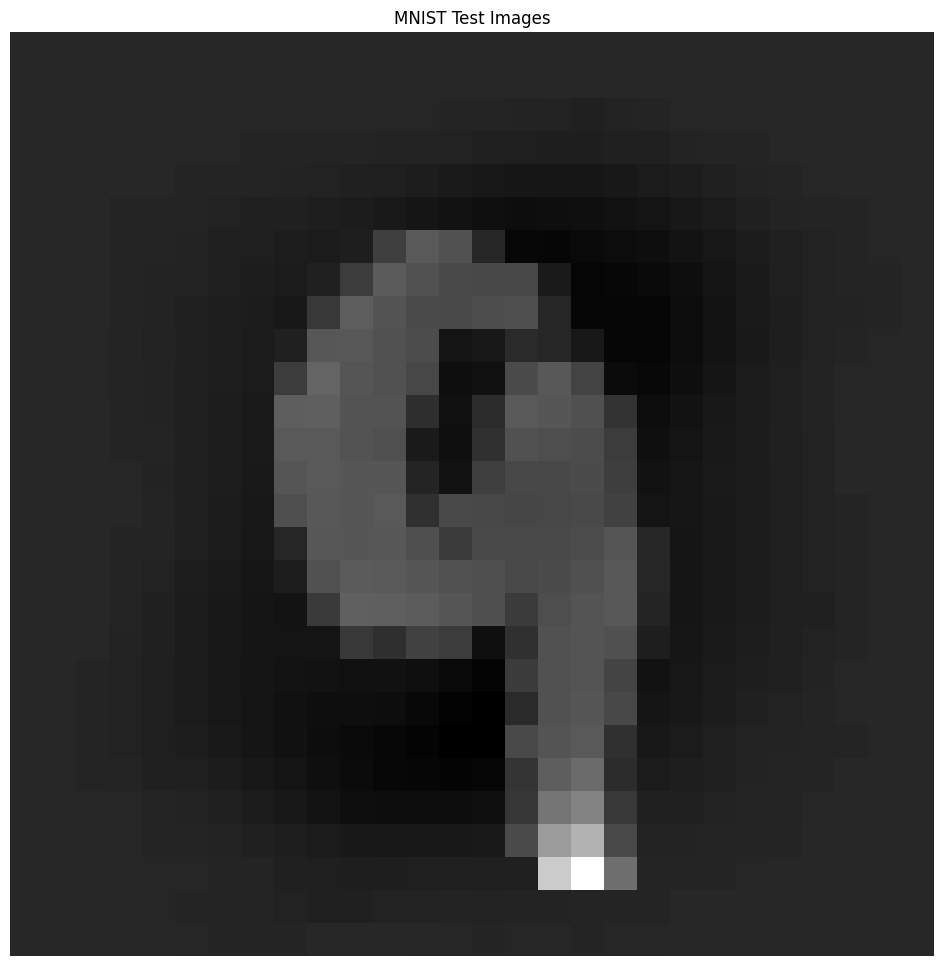

In [5]:

# Visualize some of the test images and their predicted labels
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size, size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row: (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap='gray', **options)
    plt.axis("off")

def plot_one_digit(instance, title="Digit Image", **options):
    size = 28
    image = instance.reshape(size, size)
    plt.imshow(image, cmap='gray', **options)
    plt.title(title)
    plt.axis("off")
    #plt.show()

# Display some images with predictions
plt.figure(figsize=(12, 12))
example_images = X_test_scaled[:100]
example_labels = y_test[:100]
predicted_labels = y_pred[:100]
plot_one_digit(example_images[2])
plt.title("MNIST Test Images")
plt.show()


In [6]:

print("Predicted labels:", predicted_labels[:100])
print("True labels:", example_labels[:100])


Predicted labels: [3 6 9 6 1 1 7 1 0 1 4 4 1 7 7 1 3 3 3 1 3 2 9 3 2 4 2 1 2 9 1 4 0 5 2 8 9
 1 0 0 4 6 8 7 7 1 2 5 8 9 1 3 4 2 7 8 9 6 6 1 0 5 2 2 7 6 2 8 6 2 5 3 2 1
 2 9 7 0 1 2 9 2 2 7 3 2 1 4 2 6 2 1 9 7 6 2 2 0 4 7]
True labels: 361    3
73     6
374    9
155    6
104    1
      ..
347    2
86     3
75     0
438    4
15     7
Name: class, Length: 100, dtype: int64
